## ROA SERRANO Walter - LIEPO Brice-Kevin - Maxence FUZELLIER- Antoine BARBET

# I) IMPORTATION LIBRAIRIES

In [67]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# II) PRESENTATION DES DONNEES

In [68]:
# Import data
Admission = pd.read_csv('Admission.csv', index_col = "Serial No.")

In [69]:
Admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [70]:
Admission.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
Serial No.,,,,,,,,
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91
399,312,103,3,3.5,4.0,8.78,0,0.67
400,333,117,4,5.0,4.0,9.66,1,0.95


In [71]:
Admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [72]:
Admission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admission Chance     400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


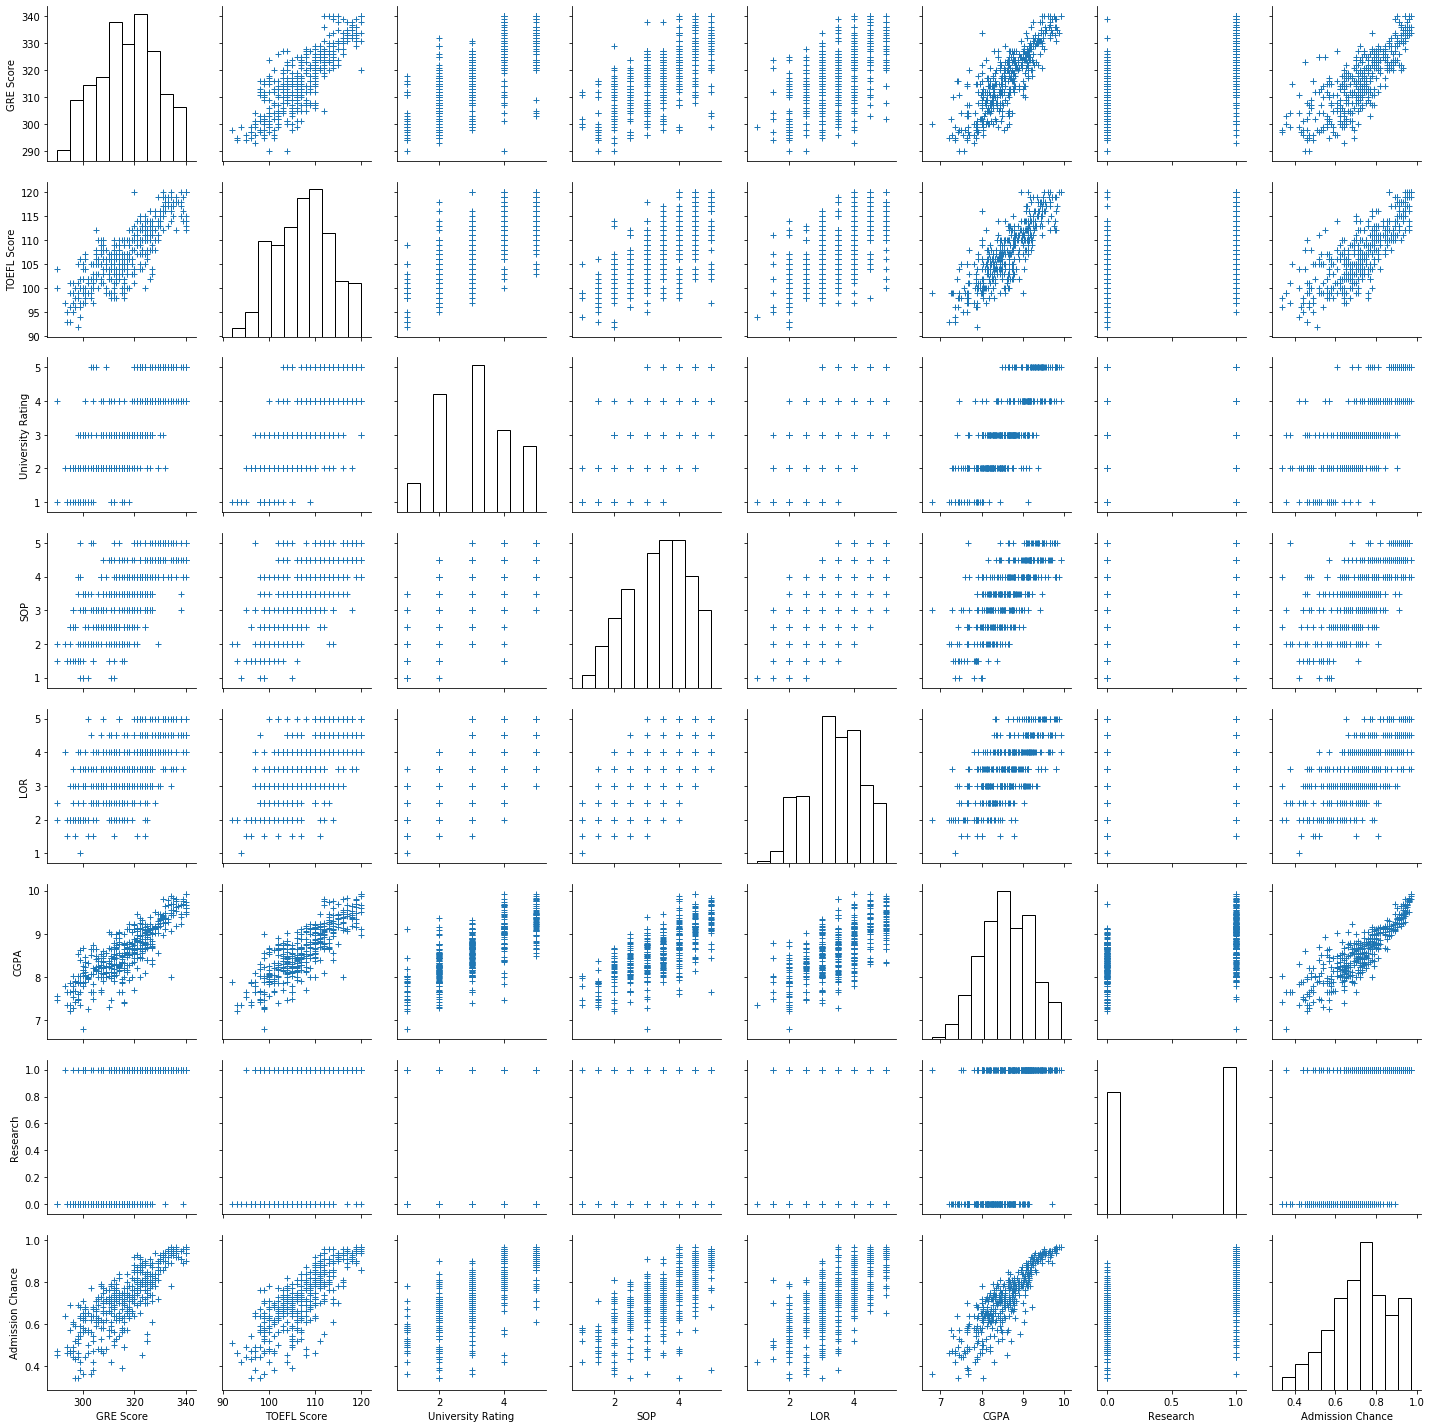

In [73]:
sns.pairplot(
    Admission,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

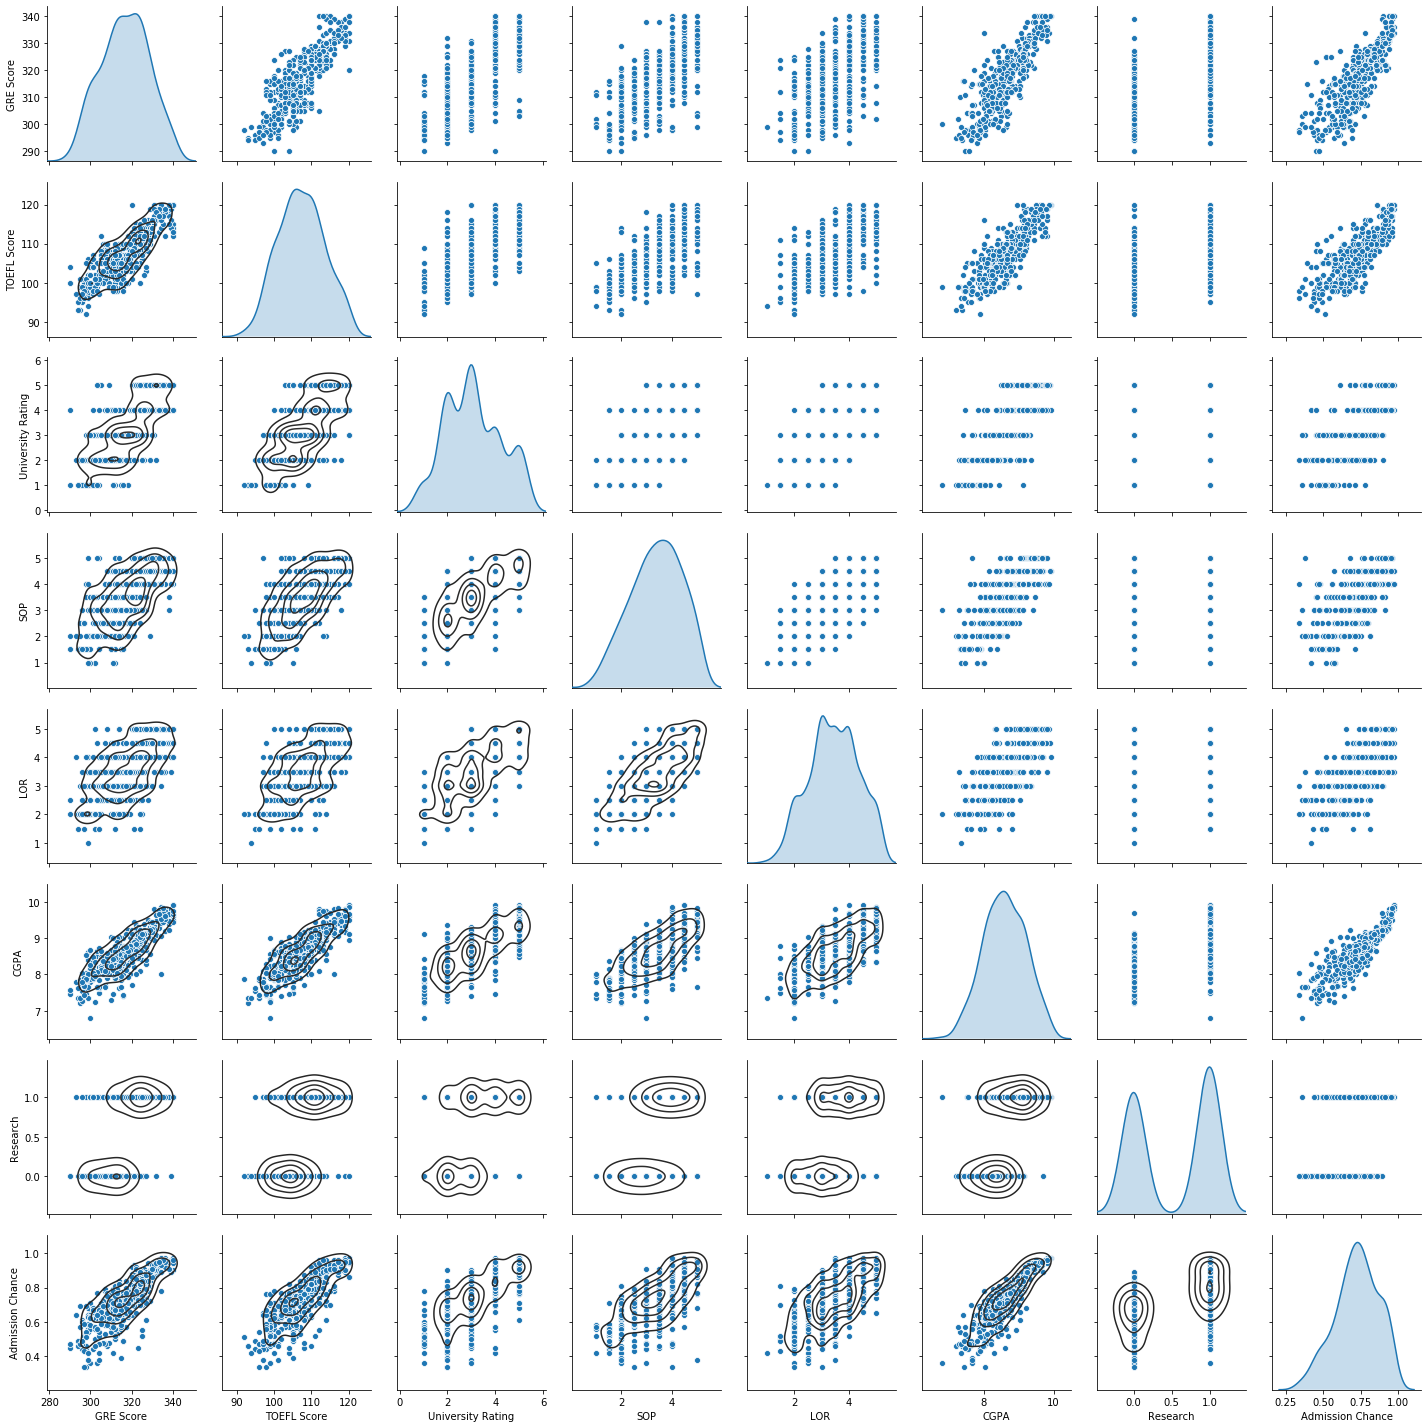

In [74]:
g = sns.pairplot(Admission, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

# III) ACP

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
print(pca.fit(Admission))
pca.explained_variance_ratio_

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


array([0.934722  , 0.05385433, 0.00667936, 0.00203256])

In [80]:
PCA(n_components=4)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

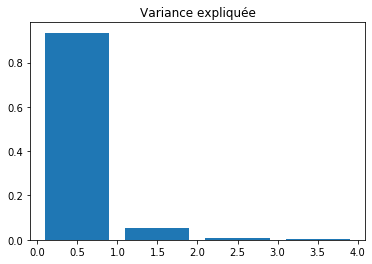

In [81]:
plt.bar(np.arange(len(pca.explained_variance_ratio_)) + 0.5,
        pca.explained_variance_ratio_)
plt.title("Variance expliquée");

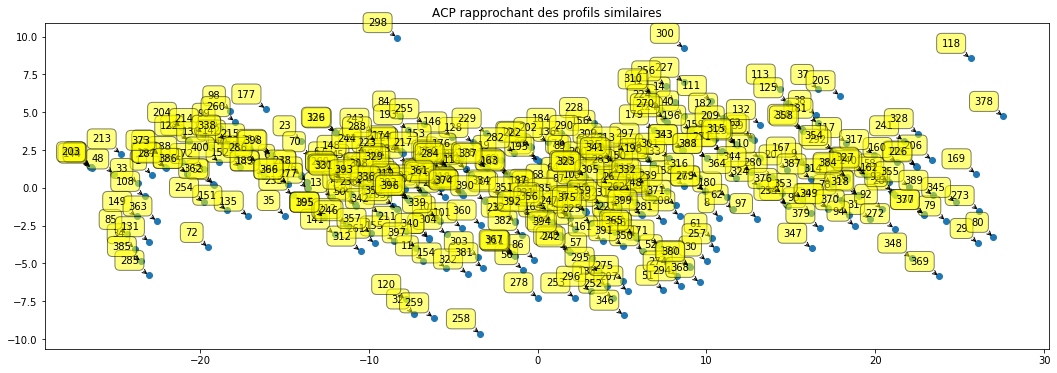

In [82]:
from sklearn.cluster import KMeans
X_reduced = pca.transform(Admission)
plt.figure(figsize=(18, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

for label, x, y in zip(Admission.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.title("ACP rapprochant des profils similaires");

# IV) RECHERCHE DU NOMBRE DE CLUSTER

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1) Elbow method

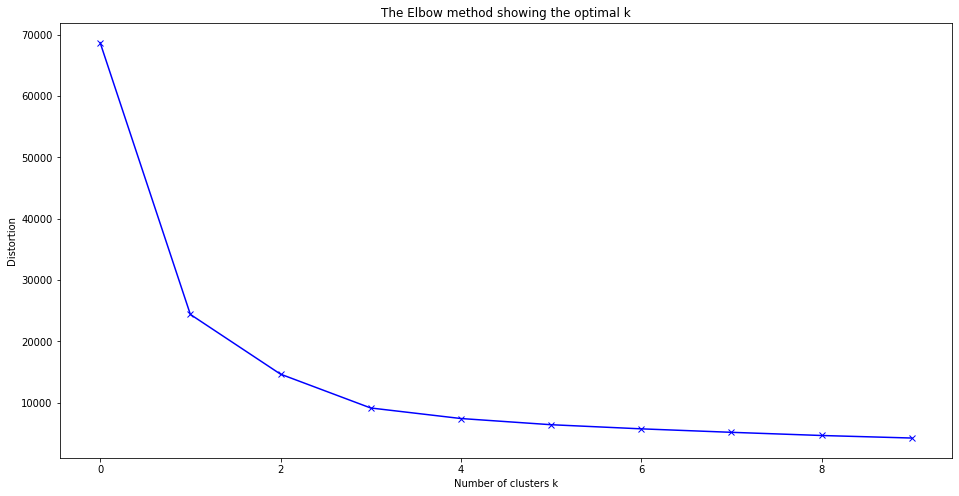

In [84]:
distortions = []
for k in range(1, 11):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(Admission)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize = (16, 8))
plt.plot(distortions, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')
plt.show()


### 2) Silhouette method

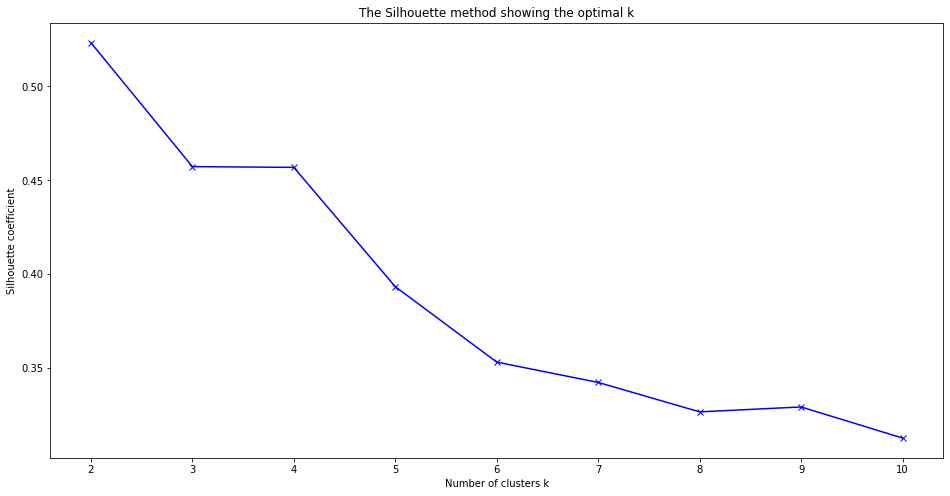

In [86]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(Admission)
    score = silhouette_score(Admission, kmeanModel.labels_)
    silhouette_coefficients.append(score)

# Plot silhouette method
plt.figure(figsize = (16, 8))
plt.plot(range(2, 11), silhouette_coefficients, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette coefficient')
plt.title('The Silhouette method showing the optimal k')
plt.show()


### 3) Dendrogramme

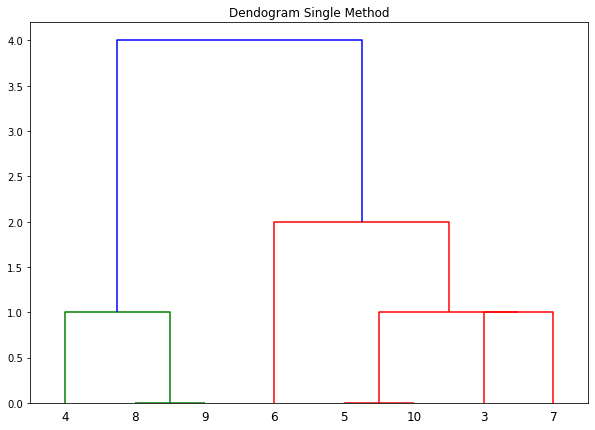

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
plt.title("Dendogram Single Method")
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# V) CLASSIFICATION ASCENDANTE HIERARCHIQUE

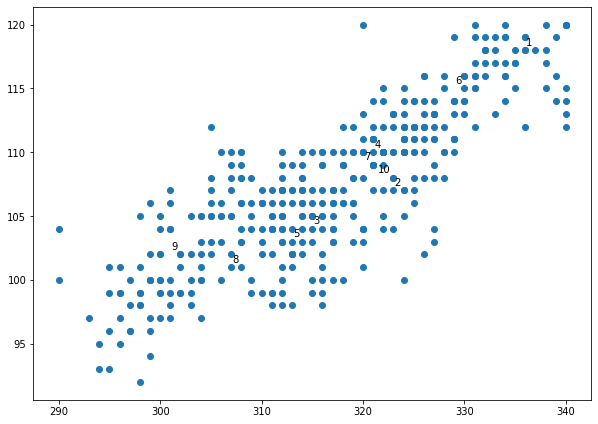

In [88]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(Admission.iloc[:,0], Admission.iloc[:,1], label='True Position')

for label, x, y in zip(labels, Admission.iloc[:, 0], Admission.iloc[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

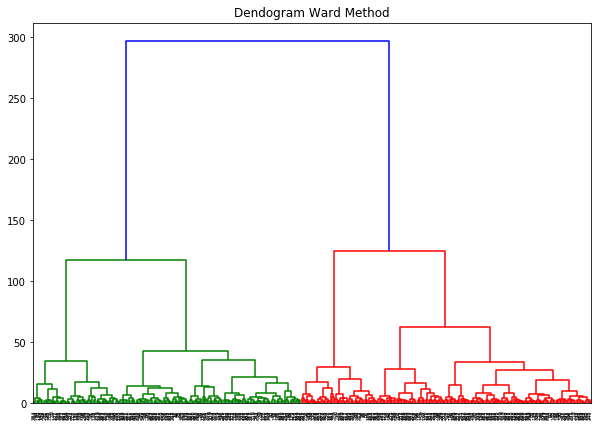

In [89]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendogram Ward Method")
dend = shc.dendrogram(shc.linkage(Admission, method='ward'))

In [90]:
from sklearn.cluster import AgglomerativeClustering
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2.fit_predict(Admission)

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

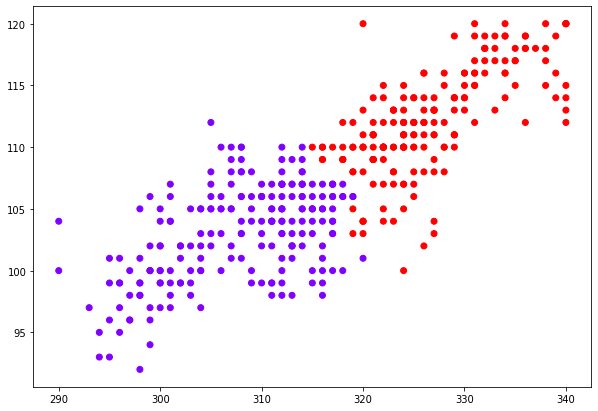

In [91]:
plt.figure(figsize=(10, 7))
plt.scatter(Admission.iloc[:,0], Admission.iloc[:,1], c=cluster2.labels_, cmap='rainbow')

In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster4.fit_predict(Admission)

array([3, 1, 0, 1, 0, 3, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       3, 3, 3, 3, 1, 2, 2, 0, 2, 1, 3, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 3,
       1, 1, 3, 3, 1, 1, 0, 0, 3, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 0, 0, 1, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 3, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 3, 0,
       0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 3, 3, 0, 0, 2, 2, 1, 1, 1, 3, 3, 0,
       0, 1, 3, 0, 0, 0, 1, 1, 1, 3, 3, 3, 1, 1, 0, 1, 3, 0, 3, 3, 1, 1,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 3, 1, 1, 1, 1,
       3, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 1, 1, 3, 1, 0, 0, 0,
       0, 0, 0, 1, 3, 3, 2, 2, 0, 0, 0, 2, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 3, 0, 2, 2, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 0, 1, 1, 3, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 1, 3, 3,
       3, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 0,

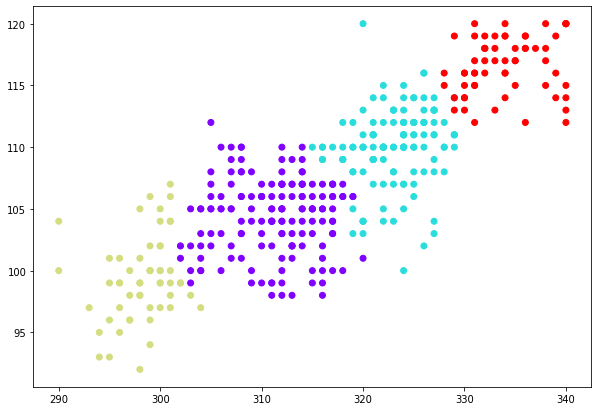

In [93]:
plt.figure(figsize=(10, 7))
plt.scatter(Admission.iloc[:,0], Admission.iloc[:,1], c=cluster4.labels_, cmap='rainbow')

# VI) K-MEANS

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

### Visualisation du jeu de données

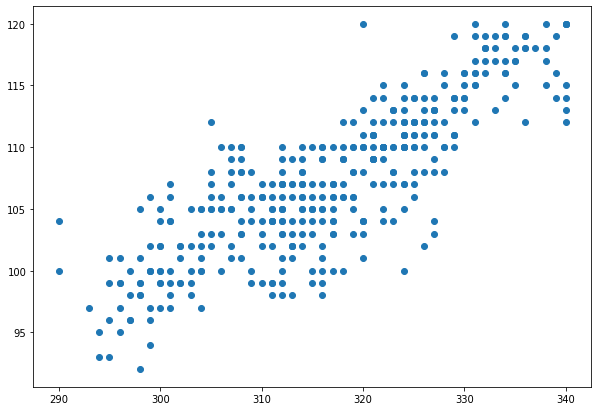

In [95]:
plt.figure(figsize=(10, 7))
plt.scatter(Admission.iloc[:,0], Admission.iloc[:,1], label='True Position')

## Creation de Clusters

### 2 CLUSTERS

In [96]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(Admission)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [97]:
print(kmeans2.labels_)

[0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0]


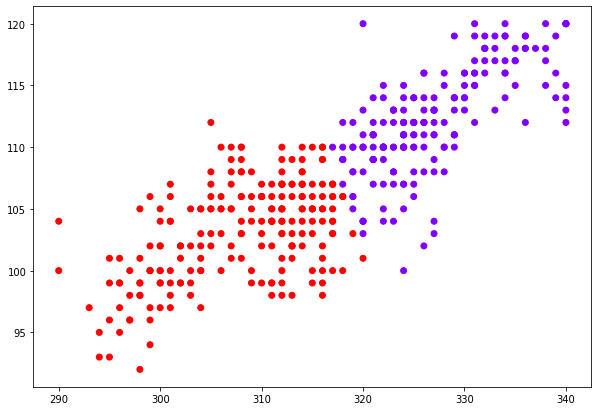

In [98]:
plt.figure(figsize=(10, 7))
plt.scatter(Admission.iloc[:,0], Admission.iloc[:,1], c=kmeans2.labels_, cmap='rainbow')

### 4 CLUSTERS

In [99]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(Admission)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
print(kmeans4.labels_)

[2 0 1 0 1 2 0 1 3 0 0 0 0 1 1 1 1 0 0 3 1 0 2 2 2 2 0 3 3 1 3 0 2 2 2 0 3
 3 3 1 1 1 1 2 0 0 2 2 0 0 1 1 2 0 0 0 1 3 3 1 1 1 3 1 0 0 0 1 0 2 2 2 0 1
 1 2 0 3 3 3 1 2 0 0 2 1 1 1 1 1 1 3 3 3 3 3 3 2 2 0 0 1 1 1 0 1 0 2 2 3 1
 0 3 0 1 1 3 3 3 0 2 2 1 1 3 3 0 0 0 2 2 3 1 0 2 1 1 1 0 0 0 2 2 2 0 0 1 0
 2 1 2 2 0 0 0 1 1 1 1 3 1 3 0 1 0 0 3 1 3 1 1 2 0 0 0 0 2 0 1 1 3 1 3 1 1
 0 1 2 2 0 0 0 0 2 1 1 1 1 1 1 1 1 2 2 3 3 1 1 1 3 0 0 2 2 2 2 0 0 0 1 1 1
 0 1 1 3 1 1 0 0 1 0 1 3 2 0 0 2 1 3 3 1 0 0 1 0 1 1 0 0 0 1 1 2 0 1 1 0 0
 2 0 1 1 0 0 1 1 1 0 1 1 3 3 1 1 0 2 1 1 3 1 0 1 0 2 2 2 0 1 1 1 3 3 1 1 1
 1 0 2 1 1 0 0 0 1 0 0 0 1 1 0 0 1 3 1 1 3 3 0 0 1 0 1 3 1 0 3 3 0 3 0 1 1
 0 1 0 0 2 0 0 1 0 1 3 3 1 3 3 3 1 0 0 3 3 3 1 0 3 1 0 0 2 2 1 1 2 0 1 3 3
 1 0 2 0 1 3 3 3 3 1 0 0 0 3 2 2 3 1 3 0 1 1 0 1 0 0 0 2 1 2]


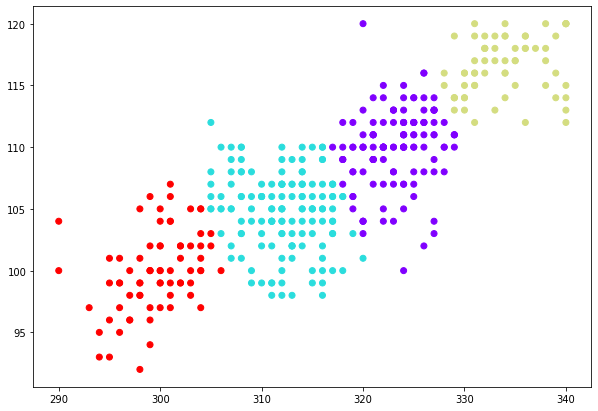

In [101]:
plt.figure(figsize=(10, 7))
plt.scatter(Admission.iloc[:,0], Admission.iloc[:,1], c=kmeans4.labels_, cmap='rainbow')

# VII) INTERPRÉTATION DES CLASSES

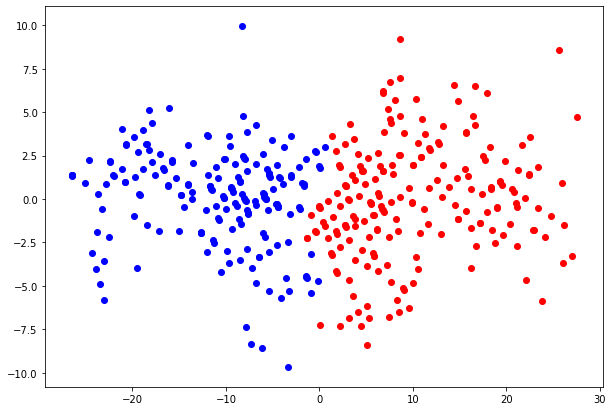

In [102]:
#Avec l’ACP, nous tenons compte des liaisons entre les variables. L’analyse est plus riche.
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(Admission)
plt.figure(figsize=(10, 7))
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[cluster2.labels_==k,0],acp[cluster2.labels_==k,1],c=couleur)
plt.show() 

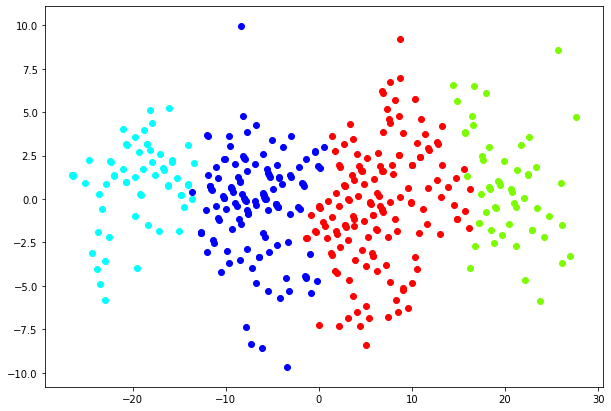

In [103]:
#Avec l’ACP, nous tenons compte des liaisons entre les variables. L’analyse est plus riche.
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(Admission)
plt.figure(figsize=(10, 7))
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[cluster4.labels_==k,0],acp[cluster4.labels_==k,1],c=couleur)
plt.show()